## PROBLEM STATEMENT

### I obtained the FIFA dataset from kaggle. This data shows players, their clubs, and their attributes, such as skills. The dataset provided is dirty and the aim is to clean the data and perform some exploratory data analysis.

### Some questions we seek to answer are;
##### 1. What is the distribution of overall ratings among footballers ?
##### 2. What is the average age among footballers?
##### 3. Which countries produce the highest number of footballers?
##### 4. What are the popular positions in football?

### Imported libraries 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [21]:
### Display outputs inline

In [22]:
%matplotlib inline

In [23]:
### To see all columns and rows

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
# Setting the display column width for seeing the entire text contents

In [26]:
pd.set_option('display.max_colwidth', -1)

C:\Users\User\AppData\Local\Temp\ipykernel_2440\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Imported file

In [27]:
fifa = pd.read_csv("fifa21_raw_data_v2_copy_Copy.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_2440\3328397067.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv("fifa21_raw_data_v2_copy_Copy.csv")


### Displaying the first five entries

In [28]:
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/210006/,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyne/210006/,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silva-santos-jr/210006/,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


### Making a copy of the data

In [5]:
copy_fifa = fifa.copy()

In [6]:
copy_fifa

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


### Saving the copied file

In [7]:
copy_fifa.to_csv("copy_fifa.csv")

### Displaying the shape of the fifa dataset

In [29]:
fifa.shape

(18979, 77)

#### There are 18,979 rows and 77 columns 

### Getting information on the columns

In [30]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

### Checking duplicates

In [31]:
fifa[fifa.duplicated()]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits


In [32]:
fifa.duplicated().sum()

0

##### There are no duplicates in the fifa dataset, and the sum is 0

### Datatype Conversion

In [33]:
fifa['ID'] = fifa['ID'].astype(str)
fifa['Preferred Foot'] = fifa['Preferred Foot'].astype('category')
fifa['Joined'] = pd.to_datetime(fifa['Joined'])
fifa['Loan Date End'] = pd.to_datetime(fifa['Loan Date End'])
fifa['W/F'] = fifa['W/F'].astype('category')
fifa['SM'] = fifa['SM'].astype('category')
fifa['A/W'] = fifa['A/W'].astype('category')
fifa['D/W'] = fifa['D/W'].astype('category')
fifa['IR'] = fifa['IR'].astype('category')

### Identifying Null Values

#### 1. Count the number of null values in each column
#### 2. Get the column names with null values

In [35]:
null_counts = fifa.isnull().sum()  
null_cols = null_counts[null_counts > 0].index.tolist()  

### Created a new dataframe with only the columns with null values and their corresponding null counts

In [36]:
null_fifa = pd.DataFrame({'Columns': null_cols, 'Null Count': null_counts[null_cols].tolist()})

null_fifa

,Columns,Null Count
0,Loan Date End,17966
1,Hits,2595


#### Observations
1. Only two columns contain Null Values, the Loan Date End and the Hits column, the Loan Date End Nulls seem to be significant.

#### Cleaning the Hits Column

This column has 2595 null  values, values of over 1000 are represented with a decimal and a k.
To fill the missing values, the mode would be used as the data is skewed.

In [37]:
# Sampling Hits column to observe inconsistencies
fifa['Hits'].loc[6:8]

6    246 
7    120 
8    1.6K
Name: Hits, dtype: object

In [38]:
# Replaced 'K' and 'M' with their corresponding numeric values in the 'Hits' column
fifa['Hits'] = fifa['Hits'].str.replace('K', 'e3').str.replace('M', 'e6')

# Convert the 'Hits' column to numeric type
fifa['Hits'] = pd.to_numeric(fifa['Hits'])

# Filter rows where the 'Hits' column contains 'K'
k_values = fifa[fifa['Hits'].astype(str).str.contains('e3')]

fifa['Hits'].loc[6:8]

6    246.0 
7    120.0 
8    1600.0
Name: Hits, dtype: float64

In [39]:
# Checking the skewness of the hits values to fill null values
fifa['Hits'].skew()

31.04253072771258

In [40]:
# get the mode to fill in na with
mode_hits = fifa['Hits'].mode()
mode_hits

0    1.0
Name: Hits, dtype: float64

In [43]:
# filling missing values in Hits column
fifa['Hits'].fillna(1.0, inplace=True)

# change Hiits to int data type
fifa['Hits'] = fifa['Hits'].astype(int)

# Checking for null values
fifa[fifa['Hits'].isna()]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits


### Cleaning the contract column

In [45]:
# Sampling the contract column

fifa['Contract'].loc[397:405]

397    Free                
398    2019 ~ 2023         
399    2017 ~ 2023         
400    2019 ~ 2024         
401    2014 ~ 2026         
402    2018 ~ 2023         
403    2019 ~ 2023         
404    2019 ~ 2024         
405    Jun 30, 2021 On Loan
Name: Contract, dtype: object

In [46]:
# Created a new column to find the contract position of players

fifa['Contract Type'] = fifa['Contract'].apply(lambda x: 'Free' if x == 'Free' 
                                         else 'On Loan' if 'On Loan' in x 
                                         else 'Permanent' if '~' in x 
                                         else np.nan)

In [47]:
# define a function to parse the values in the 'Joined' and 'Loan Date End' columns
def parse_dates(row):
    if row['Contract'] == 'Free':
        start = np.nan
        end = np.nan
    elif 'On Loan' in row['Contract']:
        start = pd.to_datetime(row['Joined']).year
        end = row['Contract'].split(' ')[2]
    else:
        start = int(row['Contract'][:4])
        end = int(row['Contract'][-4:])
    return pd.Series({'Contract Start': start, 'Contract End': end})

# apply the function to create the new columns
fifa[['Contract Start', 'Contract End']] = fifa.apply(parse_dates, axis=1)


# convert float columns to object datatype and remove the unwanted characters
fifa['Contract Start'] = fifa['Contract Start'].astype(str)
fifa['Contract End'] = fifa['Contract End'].astype(str)

# Define a function to remove the '.i0' part from a string
def remove_dot_i(s):
    return s.split('.')[0]

# Apply the function to the fifa_clean['Contract Start']  and fifa_clean['Contract end'] column using .map()
fifa['Contract Start'] = fifa['Contract Start'].map(remove_dot_i)
fifa['Contract End'] = fifa['Contract End'].map(remove_dot_i)

# Assigning the contract start and contract end columns into categories
fifa['Contract Start'] = fifa['Contract Start'].astype('category')
fifa['Contract End'] = fifa['Contract End'].astype('category')

# view samples of the result
fifa[['Contract Type', 'Contract Start', 'Contract End']].loc[397:405]

,Contract Type,Contract Start,Contract End
397,Free,nan,nan
398,Permanent,2019,2023
399,Permanent,2017,2023
400,Permanent,2019,2024
401,Permanent,2014,2026
402,Permanent,2018,2023
403,Permanent,2019,2023
404,Permanent,2019,2024
405,On Loan,2017,2021


### Cleaning the Club, Name and Full Name columns

In [48]:
# Sampling the club column
fifa['Club'].sample(3)

13800    \n\n\n\nRoyal Excel Mouscron
1733     \n\n\n\nFortaleza           
6020     \n\n\n\nTSV Hartberg        
Name: Club, dtype: object

In [49]:
# Replacing the '\n' with an empty string
fifa['Club'] = fifa['Club'].str.replace('\n', '')
fifa['Club'].sample(3)

6901     Sampdoria
17972    Rochdale 
13284    No Club  
Name: Club, dtype: object

### Sampling name, long name and club to take care of special characters

In [57]:
fifa[['Name','LongName','Club']].loc[120]

Name        M. Brozović     
LongName    Marcelo Brozović
Club        Inter           
Name: 120, dtype: object

In [59]:
# Importing the unicode character database to help with character uniformity

import unicodedata

In [60]:
# Define regular expression pattern to match special characters in Name, LongName and Club columns
def remove_special_characters(text):
    """
    This function removes special_characters (accent marks) from text
    """
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Apply remove_special_characters function to Name, LongName, and Club columns
fifa['Name'] = fifa['Name'].apply(remove_special_characters)
fifa['LongName'] = fifa['LongName'].apply(remove_special_characters)
fifa['Club'] = fifa['Club'].apply(remove_special_characters)

# Check if special characters were removed
fifa[['Name','LongName','Club']].loc[120]

Name        M. Brozovic     
LongName    Marcelo Brozovic
Club        Inter           
Name: 120, dtype: object

### Cleaning the height  and weight column

In [62]:
# sampling the height column

fifa['Height'].iloc[845:850]

845    188cm
846    170cm
847    6'3" 
848    6'5" 
849    185cm
Name: Height, dtype: object

In [63]:
# defining a function to replace cm to feet
def convert_cm_to_feet(cm):
    cm = float(cm.replace('cm', '')) # remove 'cm' units and convert to float
    feet = int(cm / 30.48) # calculate number of feet
    inches = round((cm / 2.54) % 12) # calculate number of inches and round to nearest integer
    return f"{feet}'{inches}\"" # return result in feet and inches format

# apply the conversion function only to values that are in cm
fifa['Height'] = fifa['Height'].apply(lambda x: convert_cm_to_feet(x) if 'cm' in x else x)

# view the result
fifa['Height'].iloc[845:850]

845    6'2"
846    5'7"
847    6'3"
848    6'5"
849    6'1"
Name: Height, dtype: object

In [65]:
# Sampling the weight column

fifa['Weight'].loc[792:794]

792    75kg  
793    183lbs
794    86kg  
Name: Weight, dtype: object

In [66]:
# define a function that converts kg to lbs
def convert_kg_to_lbs(kg):
    kg = float(kg.replace('kg', '')) # remove 'kg' units and convert to float
    lbs = int(kg * 2.20462) # calculate kg
    return f"{lbs}lbs" #returns result in lbs format

# apply the conversion function only to values that are in kg
fifa['Weight'] = fifa['Weight'].apply(lambda x: convert_kg_to_lbs(x) if 'kg' in x else x)


In [68]:
fifa["Weight"].loc[792:794]

792    165lbs
793    183lbs
794    189lbs
Name: Weight, dtype: object

### Cleaning the Value, Wage and Release Clause column

In [69]:
# Sampling the columns

fifa[['Value','Wage', 'Release Clause']].loc[657:662]

,Value,Wage,Release Clause
657,€14.5M,€70K,€20.9M
658,€4.9M,€40K,€6.8M
659,€17M,€89K,€21.9M
660,€11M,€46K,€12.8M
661,€14.5M,€26K,€21M
662,€9M,€16K,€11M


In [70]:
# Define a function to convert euro and k/m suffixes to USD and millions
def convert_value(val):
    if val.startswith('€'):
        val = val.replace('€', '')
        if val.endswith('K'):
            val = float(val.replace('K', '')) * 1000
        elif val.endswith('M'):
            val = float(val.replace('M', '')) * 1000000
    
    return pd.to_numeric(val)

# Apply the conversion function to the DataFrame
fifa[['Value', 'Wage', 'Release Clause']] = fifa[['Value', 'Wage', 'Release Clause']].applymap(convert_value)

# Set the display format of floats to include a comma delimiter
pd.options.display.float_format = '{:,.2f}'.format


# quick glance at the resulting data
fifa[['Value','Wage', 'Release Clause']].loc[657:662]

,Value,Wage,Release Clause
657,"14,500,000.00","70,000.00","20,900,000.00"
658,"4,900,000.00","40,000.00","6,800,000.00"
659,"17,000,000.00","89,000.00","21,900,000.00"
660,"11,000,000.00","46,000.00","12,800,000.00"
661,"14,500,000.00","26,000.00","21,000,000.00"
662,"9,000,000.00","16,000.00","11,000,000.00"


### Cleaning the W/F, SM and IR

In [72]:
# Displaying the first five entries

fifa[['W/F','SM','IR']].head()

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [73]:
fifa['W/F'] = fifa['W/F'].str.replace('\u2605', '')
fifa['SM'] = fifa['SM'].str.replace('\u2605', '')
fifa['IR'] = fifa['IR'].str.replace('\u2605', '')

# quick glance at the resulting data
fifa[['W/F','SM','IR']].sample(5)

,W/F,SM,IR
7602,3,3,1
13869,2,2,1
735,5,3,1
5195,2,1,1
12825,4,3,1


### Saved the cleaned file into the folder

In [75]:
fifa.to_csv("cleaned_fifa_data.csv")

### Exploratory Data Analysis

In [81]:
fifa.describe()

,Age,↓OVA,POT,BOV,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,"18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00","18,979.00"
mean,25.19,65.72,71.14,66.75,"2,865,062.91","9,092.06","3,962,951.31",248.94,49.69,45.84,51.94,58.77,42.70,256.48,55.59,47.25,42.39,52.73,58.53,317.72,64.36,64.41,63.37,61.66,63.93,296.61,57.80,64.58,62.65,64.79,46.79,254.20,55.59,46.39,50.30,53.86,48.06,58.07,139.91,46.56,47.71,45.64,81.44,16.42,16.21,16.08,16.22,16.52,"1,595.29",355.70,67.45,53.46,57.68,62.88,49.87,64.37,23.07
std,4.71,6.97,6.11,6.75,"7,685,154.45","19,707.02","9,772,761.89",74.30,18.13,19.57,17.29,14.52,17.65,78.65,18.76,18.21,17.23,15.18,16.57,55.88,14.89,14.64,14.60,9.07,14.06,50.73,13.31,11.84,15.80,12.49,19.30,64.60,17.14,20.70,19.43,13.71,15.66,12.08,61.22,20.14,21.37,20.92,84.67,17.55,16.82,16.49,17.00,17.85,269.87,40.76,10.68,13.83,10.08,9.93,16.44,9.60,119.84
min,16.00,47.00,47.00,48.00,0.00,0.00,0.00,42.00,6.00,3.00,5.00,7.00,3.00,40.00,5.00,4.00,5.00,5.00,5.00,122.00,13.00,12.00,14.00,24.00,12.00,122.00,18.00,15.00,12.00,16.00,4.00,50.00,9.00,3.00,2.00,9.00,6.00,12.00,20.00,3.00,5.00,4.00,10.00,2.00,2.00,2.00,2.00,2.00,747.00,232.00,25.00,16.00,25.00,25.00,12.00,28.00,1.00
25%,21.00,61.00,67.00,62.00,"475,000.00","1,000.00","423,500.00",222.00,38.00,30.00,44.00,54.00,30.00,222.00,49.00,35.00,31.00,43.00,54.00,289.00,57.00,57.00,55.00,56.00,56.00,264.00,48.00,58.00,55.00,57.00,32.00,227.50,44.00,25.00,40.00,45.00,39.00,50.00,83.00,29.00,27.00,25.00,48.00,8.00,8.00,8.00,8.00,8.00,"1,452.00",327.00,61.00,44.00,51.00,57.00,35.00,58.00,1.00
50%,25.00,66.00,71.00,67.00,"950,000.00","3,000.00","1,000,000.00",263.00,54.00,49.00,55.00,62.00,44.00,269.00,61.00,49.00,41.00,56.00,63.00,327.00,67.00,67.00,66.00,62.00,66.00,302.00,59.00,65.00,66.00,66.00,51.00,263.00,58.00,53.00,55.00,55.00,49.00,59.00,159.00,52.00,55.00,52.00,53.00,11.00,11.00,11.00,11.00,11.00,"1,627.00",356.00,68.00,56.00,58.00,64.00,53.00,65.00,4.00
75%,29.00,70.00,75.00,71.00,"2,000,000.00","8,000.00","2,800,000.00",297.00,63.00,62.00,64.00,68.00,56.00,310.00,68.00,61.00,55.00,64.00,69.00,356.00,74.00,74.00,74.00,68.00,74.00,334.00,68.00,73.00,73.00,74.00,62.00,297.00,69.00,64.00,64.00,64.00,60.00,67.00,191.00,63.00,65.00,63.00,59.00,14.00,14.00,14.00,14.00,14.00,"1,781.00",384.00,75.00,64.00,64.00,69.00,63.00,71.00,12.00
max,53.00,93.00,95.00,93.00,"185,500,000.00","560,000.00","203,100,000.00",437.00,94.00,95.00,93.00,94.00,90.00,470.00,96.00,94.00,94.00,93.00,96.00,464.00,97.00,96.00,96.00,95.00,97.00,444.00,95.00,95.00,97.00,97.00,94.00,421.00,96.00,91.00,95.00,95.00,92.00,96.00,272.00,94.00,93.00,90.00,440.00,90.00,92.00,93.00,91.00,90.00,"2,316.00",498.00,96.00,93.00,93.00,95.00,91.00,91.00,"8,400.00"


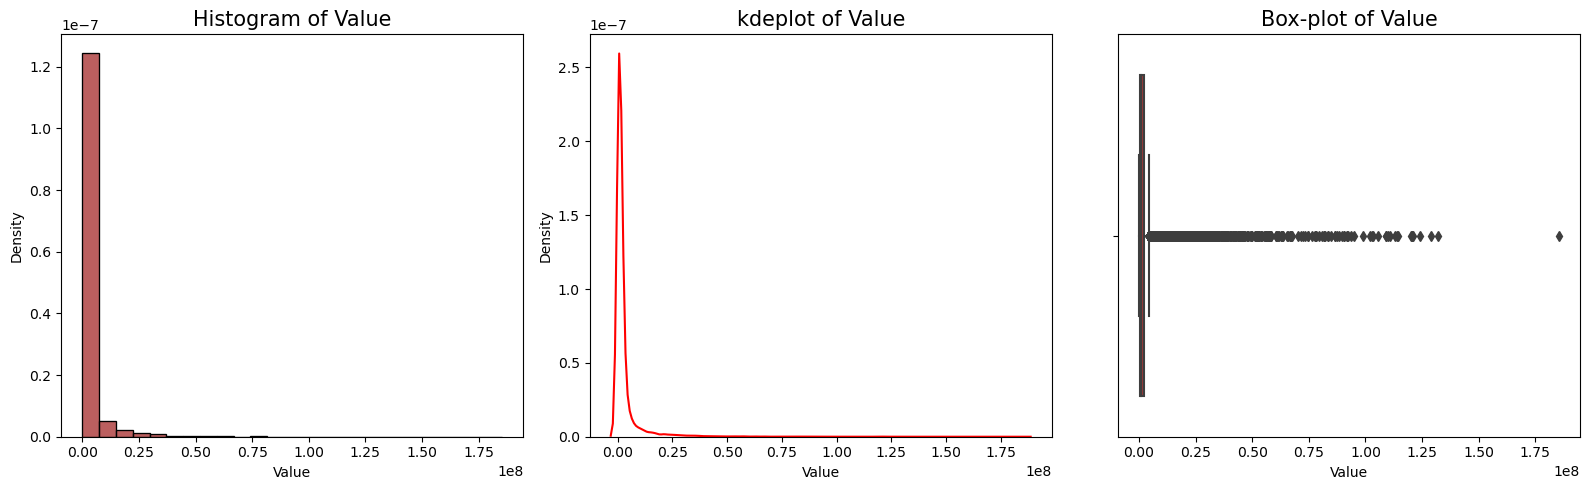

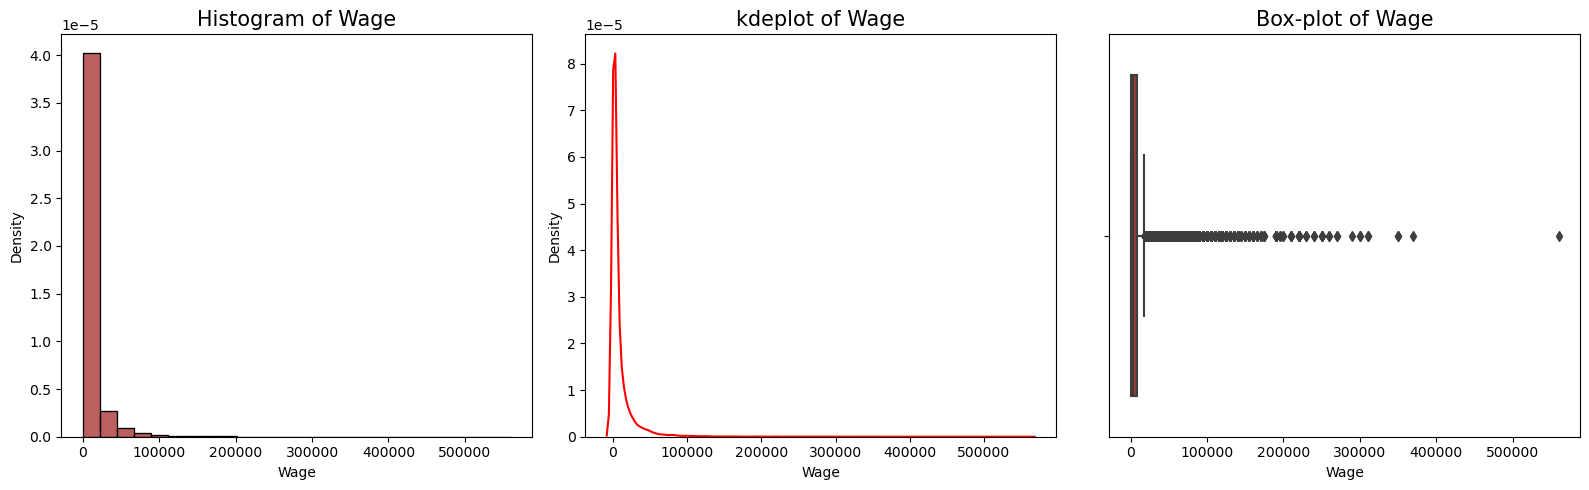

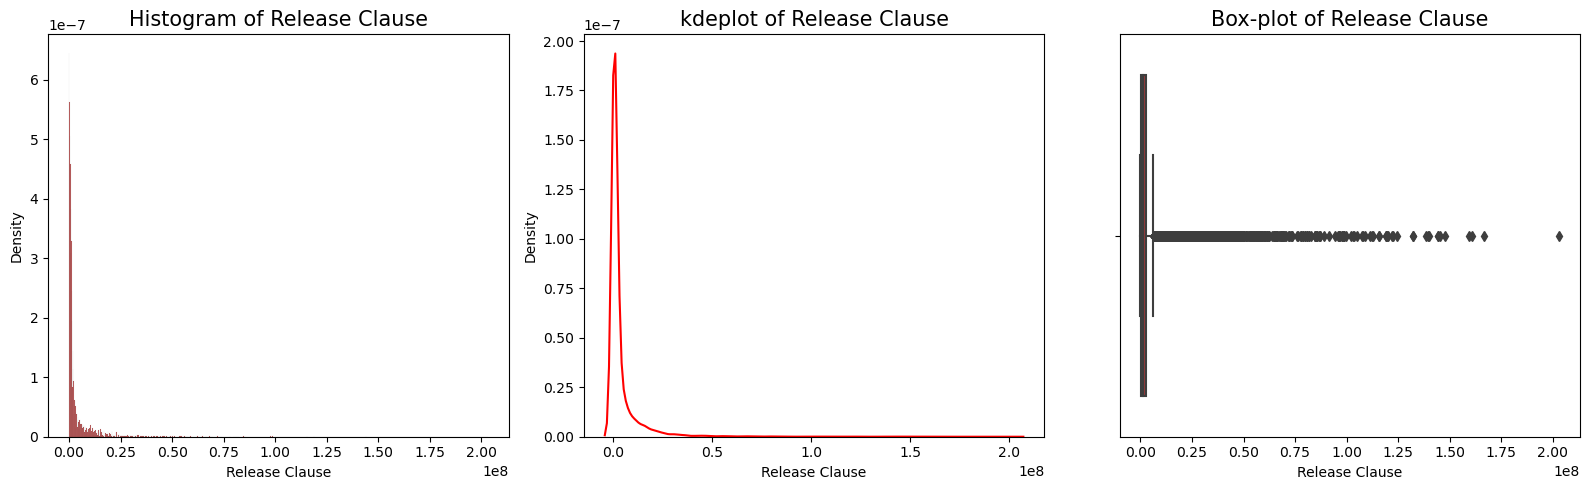

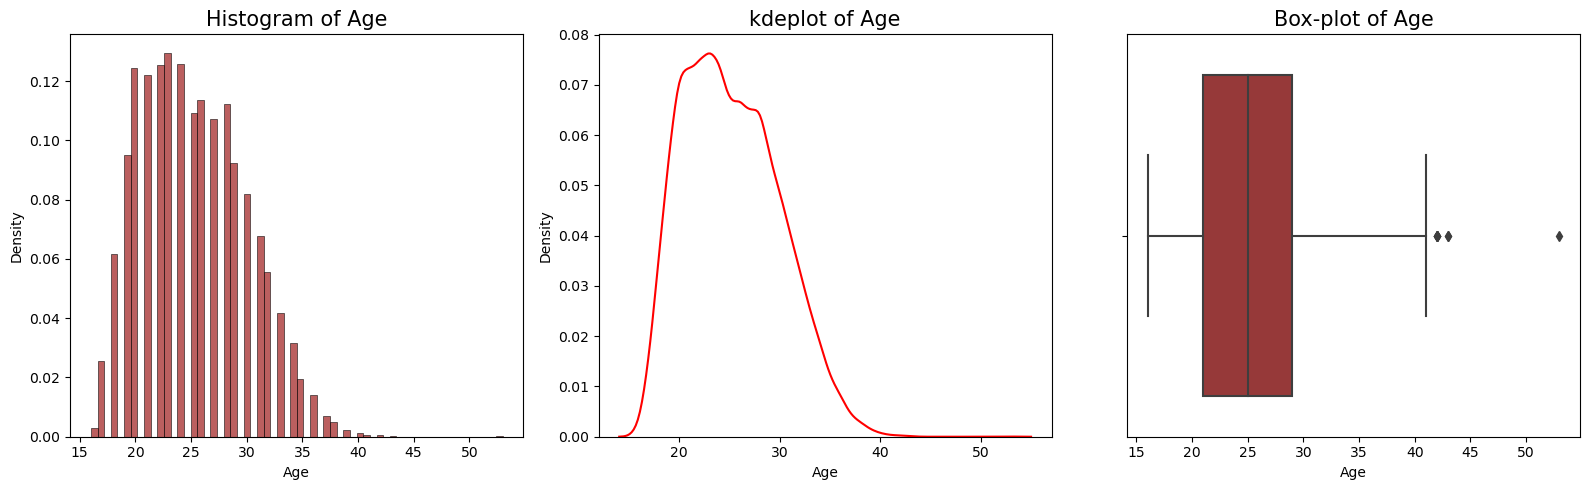

In [83]:
imp_numerical_cols= fifa[['Value','Wage','Release Clause','Age']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = fifa,x=col,stat='density',bins=bins,color='Brown')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data = fifa,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = fifa,x=col,color='brown')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

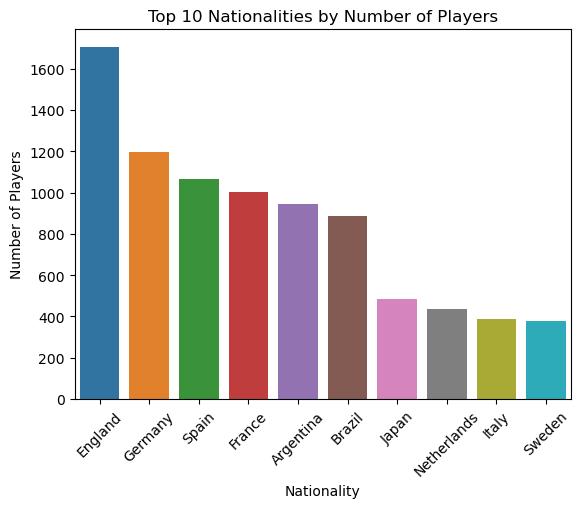

In [77]:
# Plot the top 10 nationalities by number of players
top_nationalities = fifa['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities by Number of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

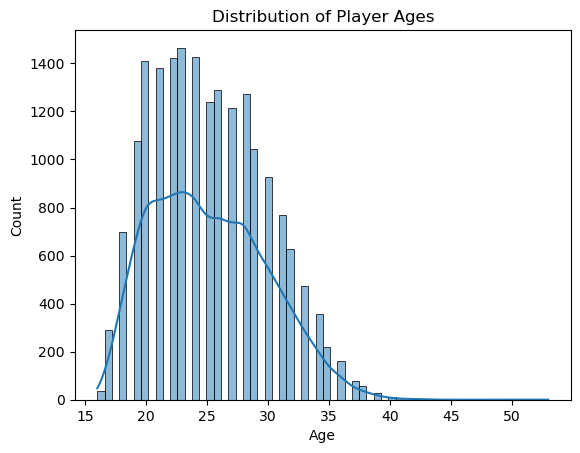

In [78]:
# Plot the distribution of ages
sns.histplot(data=fifa, x='Age', kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

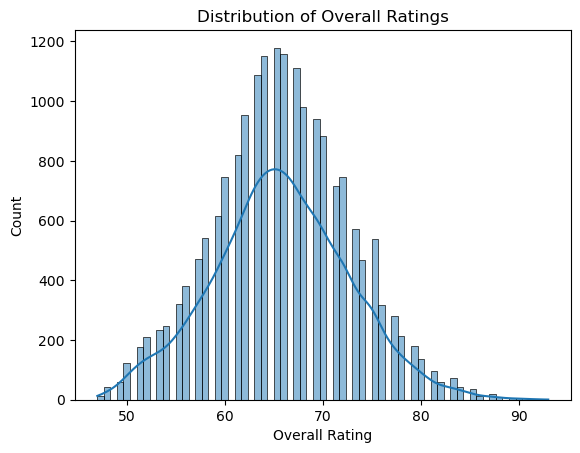

In [79]:
# Plot the distribution of overall ratings
sns.histplot(data=fifa, x='↓OVA', kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

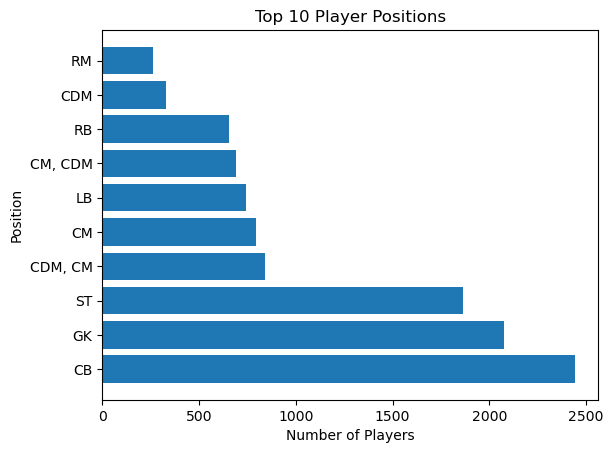

In [80]:
#creating a bar chart showing the distribution of player positions

# Count the number of players in each position
position_counts = fifa['Positions'].value_counts()

# Get the top 10 player positions
top_positions = position_counts.head(10)

# Create a horizontal bar chart
plt.barh(top_positions.index, top_positions.values)

# Set the chart title and axis labels
plt.title('Top 10 Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')

# Display the chart
plt.show()